In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import pandas as pd
import librosa as lib
import librosa, librosa.display
from tensorflow import keras
import cv2
from imutils import paths
import random
import os
from keras.preprocessing import image as im
from PIL import Image
import PIL
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tarfile
import IPython.display as ipd
from pylab import *

pip install librosa

In [2]:
#Read data from .csv file
data = pd.read_csv('Data_Sorted.csv')

#Randomize data by sampling randomly and reassigning indicies
data = data.sample(frac=1).reset_index(drop=True)
#print(data)

In [3]:
#Split dataframe into filenames and labels

filenames = data.iloc[:,0]
#print(filenames.shape)
#print(filenames)
labels = data.iloc[:,3]
#print(labels.shape)
#print(labels)


In [4]:
#Process each .wav file and store numpy arrays of their Mel Frequency Cepstral Coefficients (MFCCs) to use in NN
#TAKES A WHILE
base_dir = 'ESC-50-master/audio/'
mfccs = []
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples
for i in range(len(filenames)):
    test_file = filenames[i]
    path = os.path.join(base_dir,test_file)
    signal,sample_rate = lib.load(path,sr=22050)
    mfccs.append(librosa.feature.mfcc(signal,sample_rate,n_fft=n_fft,hop_length=hop_length,n_mfcc=1))

In [5]:
#Converts array data types and reshapes for preprocessing
labels = np.array(labels)
mfccs = tf.convert_to_tensor(mfccs)
print(mfccs.shape)
mfccstest = tf.reshape(mfccs,(800,216))
print(mfccstest.shape)

(800, 1, 216)
(800, 216)


In [6]:
#Convert dataset into pandas dataframe to normalize
mfccstest = pd.DataFrame(mfccstest)
norm_mfccs = mfccstest.apply(lambda x: (x-x.mean()) / (x.std()))
norm_mfccs = norm_mfccs.fillna(0)

In [7]:
print(mfccstest[0])
print(norm_mfccs[0])

0      tf.Tensor(-296.54214, shape=(), dtype=float32)
1      tf.Tensor(-467.98502, shape=(), dtype=float32)
2       tf.Tensor(-426.9008, shape=(), dtype=float32)
3       tf.Tensor(-594.9372, shape=(), dtype=float32)
4      tf.Tensor(-292.81213, shape=(), dtype=float32)
                            ...                      
795    tf.Tensor(-51.509182, shape=(), dtype=float32)
796     tf.Tensor(-335.9433, shape=(), dtype=float32)
797     tf.Tensor(-431.7385, shape=(), dtype=float32)
798     tf.Tensor(-553.6154, shape=(), dtype=float32)
799    tf.Tensor(-110.38846, shape=(), dtype=float32)
Name: 0, Length: 800, dtype: object
0      tf.Tensor(-0.24197675, shape=(), dtype=float32)
1       tf.Tensor(-1.1843661, shape=(), dtype=float32)
2      tf.Tensor(-0.95853376, shape=(), dtype=float32)
3       tf.Tensor(-1.8821983, shape=(), dtype=float32)
4      tf.Tensor(-0.22147359, shape=(), dtype=float32)
                            ...                       
795      tf.Tensor(1.1049235, shape=(), 

In [8]:
#Split into train and test data
train_data = norm_mfccs.iloc[0:599,:]
train_label = labels[0:599]
test_data = norm_mfccs.iloc[600:800,:]
test_label = labels[600:800]

train_data = np.asarray(train_data)
test_data = np.asarray(test_data)

train_data = tf.convert_to_tensor(train_data,dtype = tf.float32)
test_data = tf.convert_to_tensor(test_data,dtype = tf.float32)

In [9]:
#Build sequential model
model = keras.models.Sequential()
model.add(tf.keras.layers.Dense(216,activation = "relu",input_dim=216))
model.add(tf.keras.layers.Dense(32,activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1,activation = "sigmoid"))

opt = keras.optimizers.Adam(learning_rate = 0.00005)
model.compile(optimizer = opt,loss = 'binary_crossentropy',metrics = ['binary_accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 216)               46872     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                6944      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 53,849
Trainable params: 53,849
Non-trainable params: 0
_________________________________________________________________


In [10]:
#Define fit parameters, fit model to training data
num_epochs = 100;
batch_size = 5;
history = model.fit(train_data,train_label,batch_size=batch_size,epochs=num_epochs)

Epoch 1/100
120/120 [==============================] - 1s 2ms/step - loss: 0.7534 - binary_accuracy: 0.5342
Epoch 2/100
120/120 [==============================] - 0s 2ms/step - loss: 0.6820 - binary_accuracy: 0.5776
Epoch 3/100
120/120 [==============================] - 0s 2ms/step - loss: 0.6282 - binary_accuracy: 0.6411
Epoch 4/100
120/120 [==============================] - 0s 2ms/step - loss: 0.6350 - binary_accuracy: 0.6177
Epoch 5/100
120/120 [==============================] - 0s 2ms/step - loss: 0.6340 - binary_accuracy: 0.6294
Epoch 6/100
120/120 [==============================] - 0s 2ms/step - loss: 0.6230 - binary_accuracy: 0.6411
Epoch 7/100
120/120 [==============================] - 0s 2ms/step - loss: 0.6118 - binary_accuracy: 0.6728
Epoch 8/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5992 - binary_accuracy: 0.6745
Epoch 9/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5980 - binary_accuracy: 0.7045
Epoch 10/100
120/120 [======

120/120 [==============================] - 0s 2ms/step - loss: 0.4502 - binary_accuracy: 0.7796
Epoch 76/100
120/120 [==============================] - 0s 2ms/step - loss: 0.4644 - binary_accuracy: 0.7613
Epoch 77/100
120/120 [==============================] - 0s 2ms/step - loss: 0.4547 - binary_accuracy: 0.7629A: 0s - loss: 0.4598 - binary_accuracy: 0.754
Epoch 78/100
120/120 [==============================] - 0s 2ms/step - loss: 0.4496 - binary_accuracy: 0.7896
Epoch 79/100
120/120 [==============================] - 0s 2ms/step - loss: 0.4647 - binary_accuracy: 0.7730
Epoch 80/100
120/120 [==============================] - 0s 2ms/step - loss: 0.4496 - binary_accuracy: 0.7896
Epoch 81/100
120/120 [==============================] - 0s 2ms/step - loss: 0.4540 - binary_accuracy: 0.7679
Epoch 82/100
120/120 [==============================] - 0s 2ms/step - loss: 0.4482 - binary_accuracy: 0.7663
Epoch 83/100
120/120 [==============================] - 0s 2ms/step - loss: 0.4535 - binary_accu

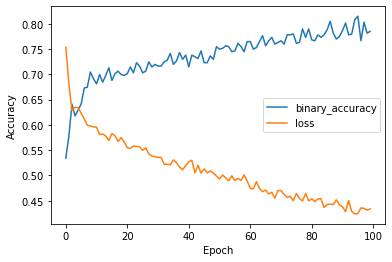

In [11]:
#Plot binary accuracy and binary crossentropy loss metrics
plt.plot(history.history['binary_accuracy'], label='binary_accuracy')
plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='right');

In [12]:
#Evaluate the model using the test dataset
test_history = model.evaluate(test_data,test_label,5)

40/40 [==============================] - 0s 913us/step - loss: 0.7145 - binary_accuracy: 0.6650


0


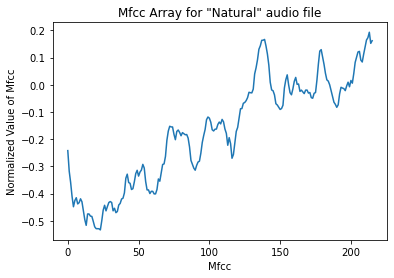

In [13]:
plt.plot(train_data[0,:])
plt.xlabel('Mfcc')
plt.ylabel('Normalized Value of Mfcc')
plt.title('Mfcc Array for "Natural" audio file')
print(train_label[0])

Text(0.5, 1.0, 'Mfcc Array for "Unnatural" audio file')

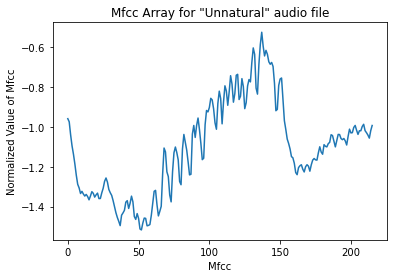

In [14]:
plt.plot(train_data[2,:])
plt.xlabel('Mfcc')
plt.ylabel('Normalized Value of Mfcc')
plt.title('Mfcc Array for "Unnatural" audio file')